In [47]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from math import log
#import rpy2
#%load_ext rpy2.ipython

In [13]:
os.chdir("C:\\Users\\nayak\\Desktop\\INSOFE\\My_Python_Scripts\\Adults")
data = pd.read_csv("adult.csv", header = None)
original = data.copy()

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',\
       'relationship','race','sex', 'capital_gain', 'capital_loss','hours_per_week', 'native_country','income']
data.columns = cols
original.columns = cols

In [16]:
data.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [17]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [18]:
data.shape

(32561, 15)

In [19]:
100 * np.round(data.income.value_counts()/data.shape[0], 2)

 <=50K    76.0
 >50K     24.0
Name: income, dtype: float64

In [20]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

Looking at the education and education_num column, since they've both got the same number of levels, and also similar connotations, they need to be inspected further. As in, are they essentially the same or are they different?

In [21]:
data[['education', 'education_num']].head(10)

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


After looking at both these columns, it is evident that the latter column is just a numeric representation of the former column and hence only one of the two is needed for the analysis. Hence dropping the column education.

In [22]:
data.drop(columns = ['education'],  axis = 1, inplace = True)

In [23]:
data.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Convert the income column into integer for the sake of visualizing our data in the form of bar chart and scatter plots.

In [24]:
data['income'] = data['income'].astype('category')
data = pd.get_dummies(columns = ['income'], data = data, drop_first = True)

In [25]:
data = data.rename(columns = {'income_ >50K':'income_more_50K'})

In [26]:
data.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_more_50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


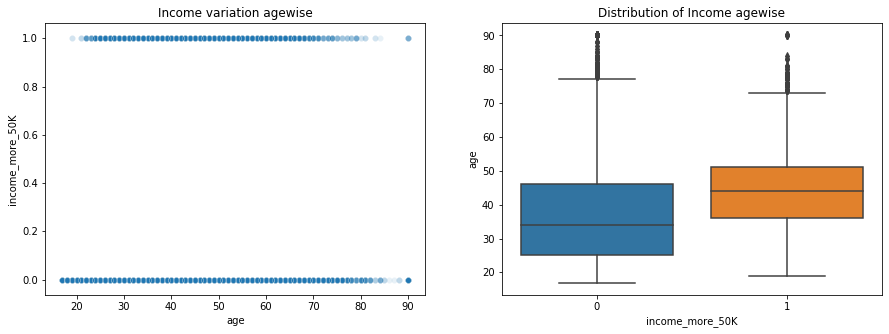

In [45]:
f, axes = plt.subplots(1, 2, figsize = (15,5), sharey = False, sharex = False)

sns.scatterplot(x = 'age', y = 'income_more_50K', data = data,alpha = 0.1, ax = axes[0])
axes[0].title.set_text("Income variation agewise")

sns.boxplot(x = 'income_more_50K', y = 'age', data = data,  ax = axes[1])
axes[1].title.set_text("Distribution of Income agewise")

Looking at the plot above, it could be said that age is not a great predictor of our target variable since there are people across the entire age range who have an income both more and less than 50K.

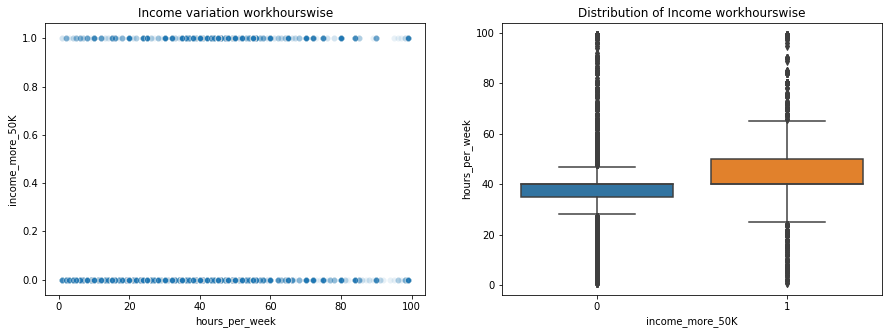

In [46]:
f, axes = plt.subplots(1, 2, figsize = (15,5), sharey = False, sharex = False)

sns.scatterplot(x = 'hours_per_week', y = 'income_more_50K', data = data,alpha = 0.1, ax = axes[0])
axes[0].title.set_text("Income variation workhourswise")

sns.boxplot(x = 'income_more_50K', y = 'hours_per_week', data = data,  ax = axes[1])
axes[1].title.set_text("Distribution of Income workhourswise")

Again hours worked in a week doesn't seem to give a good demarcation/ convenient threshold to separate people's earnings since it's all over the place. There's no clear-cut distinction that if hours per week put in is 60/75 anything and above, you're to get more money or anything.

Based on the density of the scatter points, it could be approximately said there are a few people who work less than 40 hours a week and get more than 50K as compared to those who get less.  

Similarly for those who work more than 60 hours a week, there's a larger proportion of people who get paid less than those who make more than 50K.

In [57]:
data1['capital_gain']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_gain, Length: 32561, dtype: int64

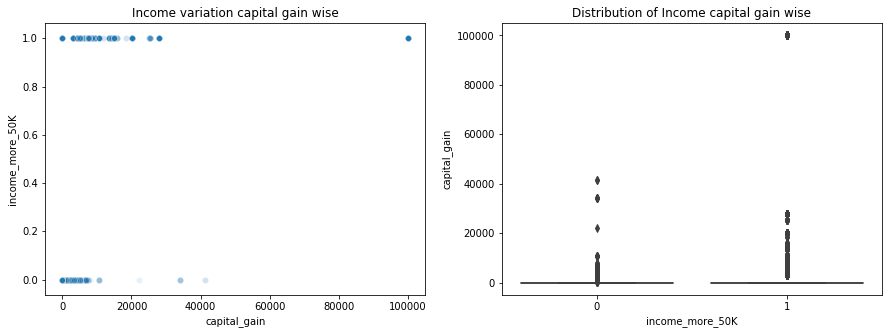

In [58]:
f, axes = plt.subplots(1, 2, figsize = (15,5), sharey = False, sharex = False)

sns.scatterplot(x = 'capital_gain', y = 'income_more_50K', data = data,alpha = 0.1, ax = axes[0])
axes[0].title.set_text("Income variation capital gain wise")

sns.boxplot(x = 'income_more_50K', y = 'capital_gain', data = data,  ax = axes[1])
axes[1].title.set_text("Distribution of Income capital gain wise")

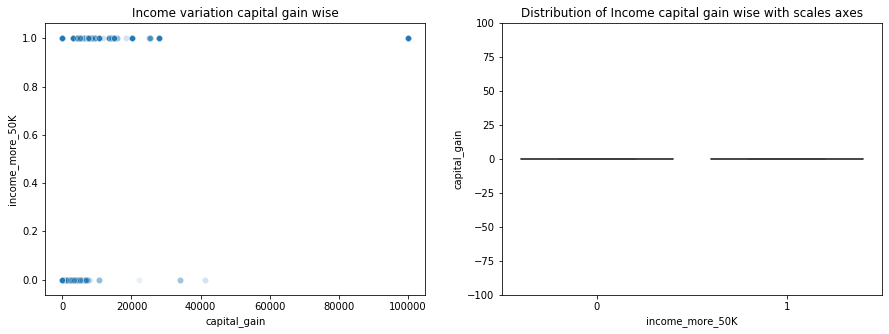

In [83]:
f, axes = plt.subplots(1, 2, figsize = (15,5), sharey = False, sharex = False)

sns.scatterplot(x = 'capital_gain', y = 'income_more_50K', data = data,alpha = 0.1, ax = axes[0])
axes[0].title.set_text("Income variation capital gain wise")

sns.boxplot(x = 'income_more_50K', y = 'capital_gain', data = data,  ax = axes[1])
axes[1].set_ylim(-100,100)
axes[1].title.set_text("Distribution of Income capital gain wise with scales axes")

In [82]:
data.capital_gain.median()

0.0

**capital_gain** is a good predictor for edge cases between the two classes looking at the scatterplot above

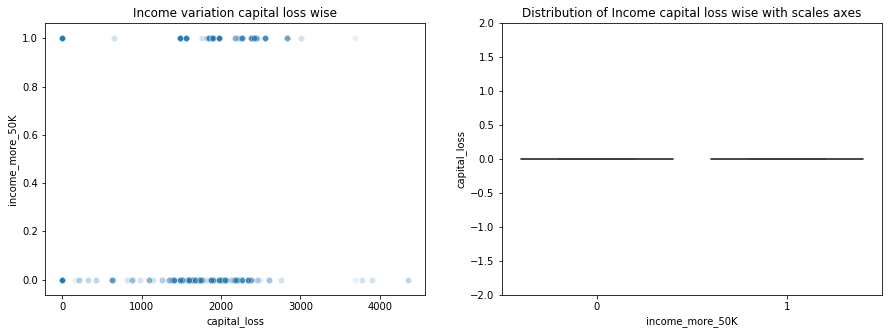

In [86]:
f, axes = plt.subplots(1, 2, figsize = (15,5), sharey = False, sharex = False)

sns.scatterplot(x = 'capital_loss', y = 'income_more_50K', data = data,alpha = 0.1, ax = axes[0])
axes[0].title.set_text("Income variation capital loss wise")

sns.boxplot(x = 'income_more_50K', y = 'capital_loss', data = data,  ax = axes[1])
axes[1].set_ylim(-2,2)
axes[1].title.set_text("Distribution of Income capital loss wise with scales axes")

This capital loss parameter isn't a good measure to tell the two income classes apart from one another. The distribution of more than 50K income almost completely overlaps with a part of the distribution of less than 50K income since the medians of both of them are zero and their whiskers also coincide with the zero mark as can be seen in the boxplot above (with scaled y-axis. This can be inferred from the box and scatter plots above.

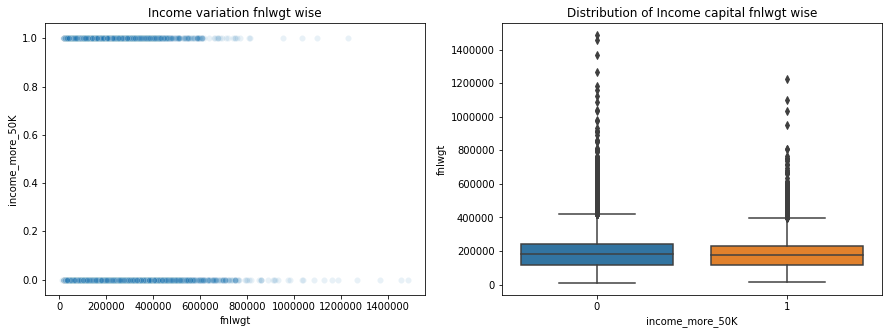

In [88]:
f, axes = plt.subplots(1, 2, figsize = (15,5), sharey = False, sharex = False)

sns.scatterplot(x = 'fnlwgt', y = 'income_more_50K', data = data,alpha = 0.1, ax = axes[0])
axes[0].title.set_text("Income variation fnlwgt wise")

sns.boxplot(x = 'income_more_50K', y = 'fnlwgt', data = data,  ax = axes[1])
axes[1].title.set_text("Distribution of Income capital fnlwgt wise")

This is not a good predictor since the distributions of the two income classes as a function of this fnlwgt variable are almost the same. There is no way to distinguish them apart from one another based on this predictor.

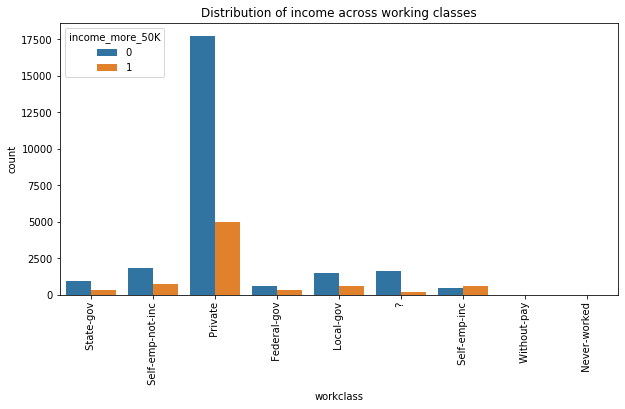

In [91]:
sns.countplot(x = 'workclass', hue = 'income_more_50K', data = data)
plt.title("Distribution of income across working classes")
plt.xticks(rotation = 90)
plt.show()

Most of the population in the dataset is concentrated in the private sector and it seems like across all segments of working classes, there are more number of "<50K" income people than the other (except Self-Emp-inc). Also we have some missing data in this column as encoded by "?"

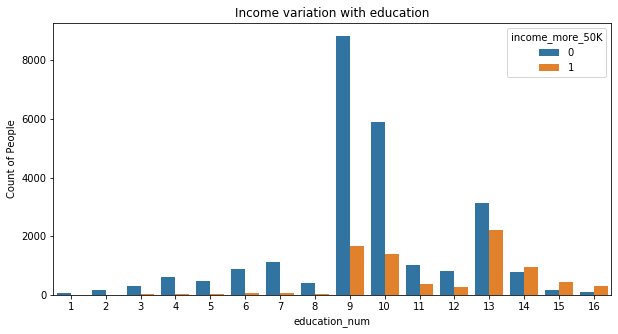

In [94]:
sns.countplot(x = 'education_num', hue = "income_more_50K", data = data)
plt.title("Income variation with education")
plt.ylabel("Count of People")
plt.show()

Most of the people are centered around the 9, 10 and 13 level educations and for that education, there are more number of people who're paid less than 50 thousand. Also, 14, 15, 16 level education people have more proportion of over 50K payees than under 50K payees. Let's see what are these.

In [112]:
labels = original[['education_num', 'education']].drop_duplicates(keep = 'first').set_index(['education_num']).to_dict()['education']

In [113]:
print("High proportion of population have educations: {} {} {}".format(labels[9], labels[10], labels[13]))
print("Education having more overpaid than underpaid obs: {} {} {}".format(labels[14], labels[15], labels[16]))      

High proportion of population have educations:  HS-grad  Some-college  Bachelors
Education having more overpaid than underpaid obs:  Masters  Prof-school  Doctorate


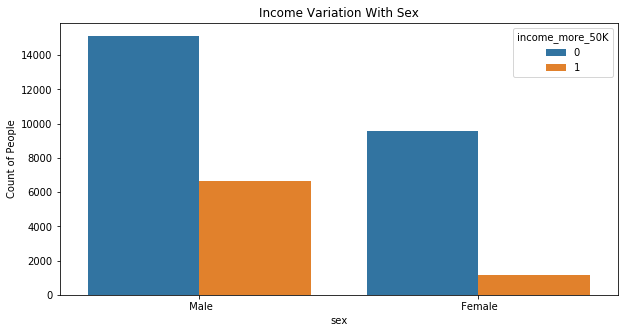

In [115]:
sns.countplot(x = 'sex', hue = 'income_more_50K', data = data)
plt.title("Income Variation With Sex")
plt.ylabel("Count of People")
plt.show()

It looks like the absolute values of males in the population is more than females but also, it seems that amongst their respective groups, there's a smaller proportion of females who have more than 50K income as compared to males.

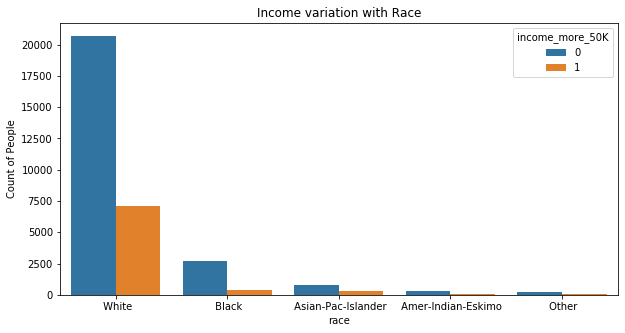

In [117]:
sns.countplot(x = 'race', hue = 'income_more_50K', data = data)
plt.title("Income variation with Race")
plt.ylabel("Count of People")
plt.show()

The dataset entries are predominantly for White people. Although there are some black and some other groups in the mix, there are a lot of observations for Whites followed by Blacks. It seems like there's a higher proportion of **"Income <= 50k"** observations in every subsection amongst the race variable.

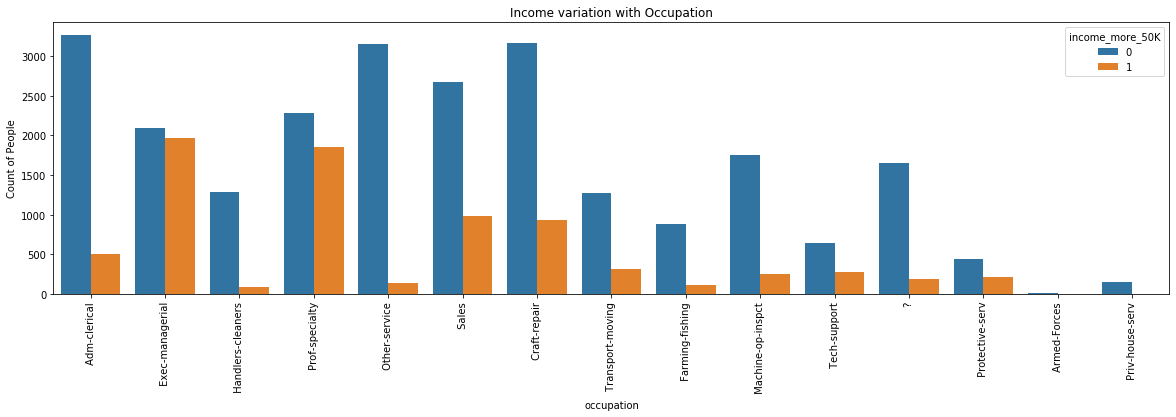

In [119]:
rcParams['figure.figsize'] = 20,5
sns.countplot(x = 'occupation', hue = 'income_more_50K', data = data)
plt.title("Income variation with Occupation")
plt.ylabel("Count of People")
plt.xticks(rotation = 90)
plt.show()

There are some people whose occupation is not known. They're mentioned with "?"  

The major jobs which pay handsomely above 50K are concentrated in Exec-managerial and Prof-Speciality fields among some others.  

Very few people actually opt to go for Armed Forces jobs and amongst them too, the proportion of people paid less than 50K is considerably higher.  



In [29]:
data.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

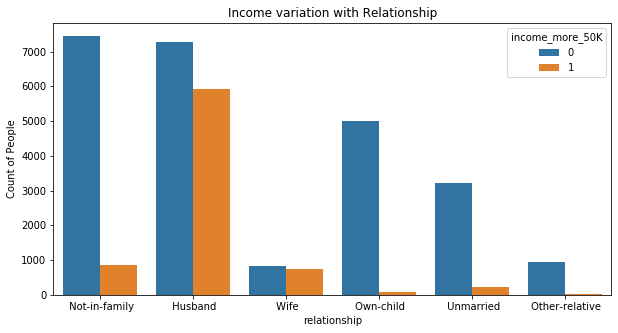

In [123]:
rcParams['figure.figsize'] = 10,5
sns.countplot(x = 'relationship', hue = 'income_more_50K', data = data)
plt.title("Income variation with Relationship")
plt.ylabel("Count of People")
plt.show()

The dataset is dominated by entries from Husbands and Not-in-family categories and across all categories, there are more people earning less than 50K than those earning more than 50K.

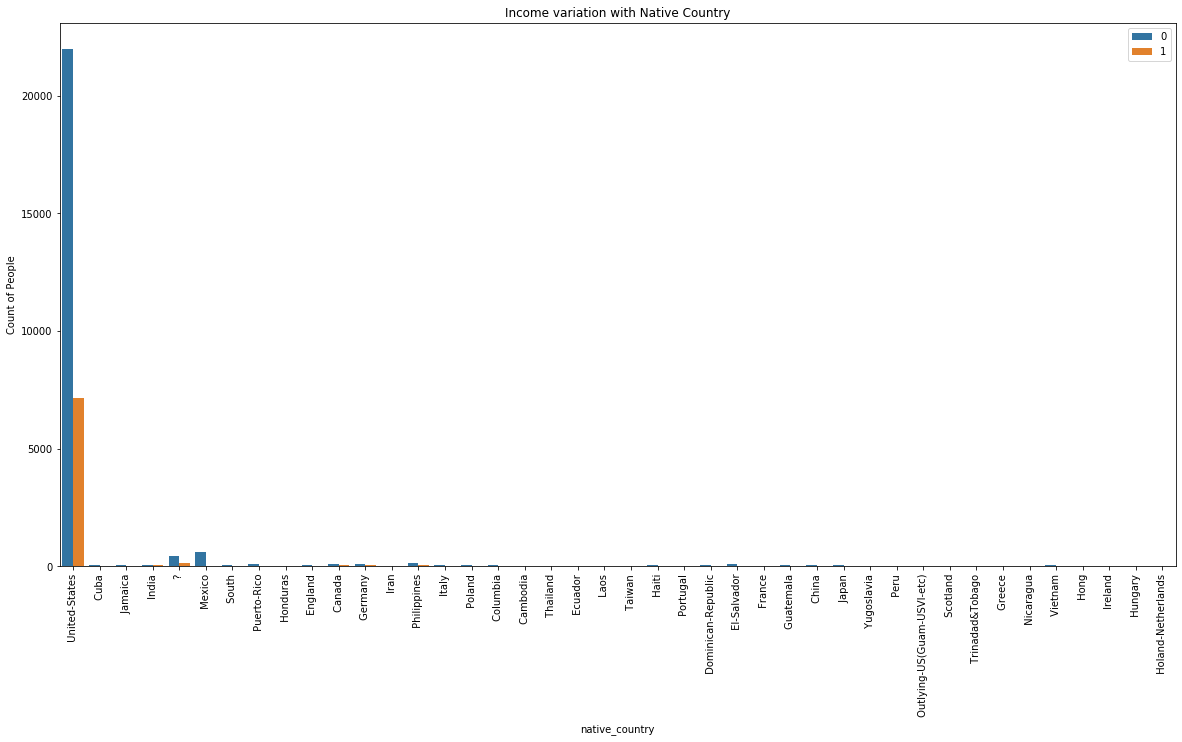

In [126]:
rcParams['figure.figsize'] = 20,10
sns.countplot(x = 'native_country', hue = 'income_more_50K', data = data)
plt.title("Income variation with Native Country")
plt.ylabel("Count of People")
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

It can be seen that most of the datapoints come from United States and a few from Mexico. All the other countries combined cannot sum up to as many datapoints as United States. So, for the sake of imputation this seems to be the **best attribute for peforming a stratified imputation.** Also, it makes sense since geographically the features will have some resemblance with each other.

In [127]:
data.groupby(by = ['native_country'])['age'].count()

native_country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                

There is a sizable amount of population hailing to nations not known/not mentioned. Let's label the entries containing "?" in the native country columns into a column called "Others" to denote all other countries in the world except the ones mentioned in this column.  

Next, there's only one observation from Holand. 1 out of 32k observations is a tiny amount to capture the variation of a country in this model, so let's drop that observation for our analysis.

In [128]:
num_cols = ['age', 'fnlwgt','capital_gain', 'capital_loss', 'hours_per_week']
cat_cols = []
for i in data.columns:
    if not i in num_cols:
        cat_cols.append(i)
cat_cols.remove('income_more_50K')
print(num_cols)
print(cat_cols)

print(np.sum(data.native_country == " Holand-Netherlands"))
data = data[data.native_country != " Holand-Netherlands"]
print(np.sum(data.native_country == " Holand-Netherlands"))

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']
['workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
1
0


In [129]:
for i in data.columns:
    print(i, np.sum(data[i] == " ?"))

age 0
workclass 1836
fnlwgt 0
education_num 0
marital_status 0
occupation 1843
relationship 0
race 0
sex 0
capital_gain 0
capital_loss 0
hours_per_week 0
native_country 583
income_more_50K 0


C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Let's label all the native_countries which have a question mark as **"Others"** as in the rest of the countries.  

Let's use target encoding (Mode) based on country for filling in the workclass and occupation features. Before that, split the dataset into train and test sets and use the mode of train sets in order to impute the values of the test set.

In [130]:
# Rename all instances of ? in native_country with others
idx = data[data.native_country == " ?"].index
#print(idx)
data.native_country[idx] = "Others"

#Split the data into X and y
X = data.drop(columns = ['income_more_50K'], axis = 1)
y = data.income_more_50K

# Perform a train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1425, test_size = 0.2)

C:\Users\nayak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\pandas\core\series.py:1292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
C:\Users\nayak\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [131]:
len(X_train.native_country.unique())

41

In [132]:
len(X_test.native_country.unique())

41

In [193]:
# Get the dictionary to substitute missing data based on mode.
X_traingby = X_train.groupby(by = ['native_country'])
substitution_dict = X_traingby.agg(lambda x: x.value_counts().index[0]).to_dict()

In [194]:
# A function to compute mode target encoding
def target_encoding(y, substitution_dict, Target, to_sub):
    '''
    Takes in a dataframe, a dictionary containing values to substitute per attribute/feature, an int specifying the 
    column number based on which target encoding is done, and what to substitute in the feature space.
    '''
    for i in range(0, len(y.columns)):
        if y.columns[i] == 'native_country':
            continue
        else:
            m = substitution_dict[y.columns[i]]
            for j in range(0, y.shape[0]):
                if y.iloc[j,i] == to_sub:
                    y.iloc[j,i] = m[y.iloc[j,Target]]
    return y

In [195]:
# Imputing and checking if all the missing values have been imputed properly
X_train = target_encoding(X_train.copy(), substitution_dict, 12, " ?")
X_test = target_encoding(X_test.copy(), substitution_dict, 12, " ?")
for i in X_train.columns:
    print(i, np.sum(X_train[i] == " ?"), np.sum(X_test[i] == " ?"))

age 0 0
workclass 0 0
fnlwgt 0 0
education_num 0 0
marital_status 0 0
occupation 0 0
relationship 0 0
race 0 0
sex 0 0
capital_gain 0 0
capital_loss 0 0
hours_per_week 0 0
native_country 0 0


C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [196]:
from sklearn.preprocessing import StandardScaler

stdzer = StandardScaler()
stdzer.fit(X_train[num_cols])
stdzer.transform(X_train[num_cols])

array([[ 0.53667037,  0.741201  , -0.14681138, -0.21945985, -0.03126165],
       [-1.00005115, -1.45096277, -0.14681138, -0.21945985,  0.7767623 ],
       [-0.56098786, -0.07500912, -0.14681138, -0.21945985, -0.27366883],
       ...,
       [ 0.6830248 ,  0.02949201, -0.14681138, -0.21945985, -0.03126165],
       [ 1.70750582, -1.12414321, -0.14681138, -0.21945985,  1.18077427],
       [-0.04874735,  1.59799463, -0.14681138, -0.21945985, -0.03126165]])

In [197]:
X_train = pd.get_dummies(columns = cat_cols, data = X_train, drop_first = True)
X_test = pd.get_dummies(columns = cat_cols, data = X_test, drop_first = True)

In [198]:
print("# Train Columns: " + str(len(X_train.columns)))
print("# Test Columns: " + str(len(X_test.columns)))

# Train Columns: 96
# Test Columns: 96


In [199]:
x = pd.DataFrame(np.sum(X_train) / (np.sum(X_train) + np.sum(X_test)), index = X_train.columns, columns = ['Percent Train Data'])

The above step confirms that train data contains at least some proportion of data corresponding to the individual categories and it will therefore be definitely trained (how good will it work, don't know but it won't crash) to handle those categories in the test data.

Standardizing the data before model building since the numerical features are along widely different scales.

In [200]:
from sklearn.preprocessing import StandardScaler
stdzer = StandardScaler()
stdzer.fit(X_train[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [201]:
# Standardize the numerical features in train data
X_train_num_cols = X_train[num_cols]
X_train.drop(columns = num_cols, inplace = True)
X_train = pd.concat([X_train.reset_index(), pd.DataFrame(stdzer.transform(X_train_num_cols),columns = num_cols)], axis = 1).set_index("index")
X_train.head()

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_num_2,education_num_3,education_num_4,...,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_Others,age,fnlwgt,capital_gain,capital_loss,hours_per_week
index,,,,,,,,,,,,,,,,,,,,,
10636,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0.536670,0.741201,-0.146811,-0.21946,-0.031262
7313,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,-1.000051,-1.450963,-0.146811,-0.21946,0.776762
21229,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.560988,-0.075009,-0.146811,-0.21946,-0.273669
72,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,-0.707342,-0.263274,-0.146811,-0.21946,2.392810
17447,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.292760,-0.358544,-0.146811,-0.21946,-0.031262


In [202]:
# Standardize the numerical features in test data
X_test_num_cols = X_test[num_cols]
X_test.drop(columns = num_cols, inplace = True)
X_test = pd.concat([X_test.reset_index(), pd.DataFrame(stdzer.transform(X_test_num_cols),columns = num_cols)], axis = 1).set_index("index")
X_test.head()

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_num_2,education_num_3,education_num_4,...,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_Others,age,fnlwgt,capital_gain,capital_loss,hours_per_week
index,,,,,,,,,,,,,,,,,,,,,
2178,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.121925,0.108564,-0.146811,-0.21946,-0.031262
13801,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.024430,-0.824240,-0.146811,-0.21946,0.776762
10896,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.195102,0.077345,1.974453,-0.21946,0.776762
12103,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.122088,1.658339,-0.146811,-0.21946,-0.031262
30987,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,-1.512292,0.042505,-0.146811,-0.21946,-0.273669


# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

params = {'C': list(np.logspace(-4,4,num = 20))}
LRClf = LogisticRegression(solver = 'liblinear')

gdCV = GridSearchCV(LRClf, param_grid=params, scoring = 'recall', cv = 3, refit = True)
gdCV.fit(X_train, y_train)
print(gdCV.best_estimator_)

LogisticRegression(C=545.5594781168514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [144]:
y_test_prob = []
for i in gdCV.predict_proba(X_test):
    y_test_prob.append(i[1])

In [145]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_test_prob, pos_label = 1)
print("AUC for this classifier is {:.3f}".format(roc_auc_score(y_test, y_test_prob)))

AUC_DF = pd.DataFrame({'TPR': tpr, 'FPR':fpr, 'Thr': np.round(threshold,3)})

AUC for this classifier is 0.907


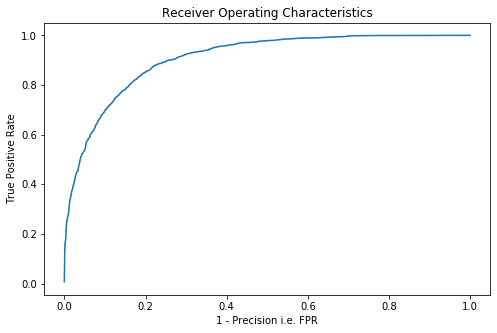

In [151]:
rcParams['figure.figsize'] = 8,5
sns.lineplot(x = 'FPR', y = 'TPR', data = AUC_DF)
plt.xlabel("1 - Precision i.e. FPR")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.show()

Looking at the AUC Curve, it seems as if the best tradeoff is somewhere close to $FPR < 0.2$ and $TPR > 0.8$. So have a sneak peak at those values in our dataframe and select appropriate threshold.

In [152]:
AUC_DF[(AUC_DF.TPR > 0.8) &  (AUC_DF.FPR < 0.2)]

,TPR,FPR,Thr
778,0.800383,0.159385,0.292
779,0.800383,0.159790,0.291
780,0.801020,0.159790,0.291
781,0.801020,0.160194,0.291
782,0.801658,0.160194,0.291
...,...,...,...
888,0.849490,0.197209,0.248
889,0.849490,0.197816,0.247
890,0.850128,0.197816,0.247
891,0.850128,0.198018,0.247


Select a threshold of 0.25 after observing the dataframe above.

In [153]:
y_pred_test = []
for i in y_test_prob:
    if i > 0.25:
        y_pred_test.append(1)
    else:
        y_pred_test.append(0)
y_pred_test[:10]

[1, 1, 0, 0, 1, 0, 1, 1, 1, 0]

In [154]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4944
           1       0.58      0.85      0.69      1568

    accuracy                           0.82      6512
   macro avg       0.76      0.83      0.78      6512
weighted avg       0.86      0.82      0.83      6512



We can see from the above statistics that our classifier is good at correctly predicting the class of people having income less than 50K. But for the class of people with income more than 50K, it takes a blow as it cannot give a good tradeoff between precision and recall. That's a drawback of this classifier. Let's try to implement some other better classifiers for this problem.

# SVM

In [155]:
# SVM with RBF kernel
from sklearn.svm import SVC
LSVC = SVC(C = 1, kernel = 'rbf', random_state = 0)

LSVC.fit(X_train, y_train)
y_pred_test_SVC = LSVC.predict(X_test)

print(classification_report(y_test, y_pred_test_SVC))

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4944
           1       0.77      0.57      0.65      1568

    accuracy                           0.85      6512
   macro avg       0.82      0.76      0.78      6512
weighted avg       0.85      0.85      0.85      6512



In [156]:
# SVM with linear kernel
from sklearn.svm import SVC
LSVC = SVC(C = 1, kernel = 'poly', degree = 2, random_state = 0)

LSVC.fit(X_train, y_train)
y_pred_test_SVC = LSVC.predict(X_test)

print(classification_report(y_test, y_pred_test_SVC))

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4944
           1       0.86      0.27      0.41      1568

    accuracy                           0.81      6512
   macro avg       0.84      0.63      0.65      6512
weighted avg       0.82      0.81      0.77      6512



In [59]:
# from sklearn.model_selection import GridSearchCV

# params_grid = {'kernel':['rbf', 'poly'],
#              'degree':[1,2,3,4],
#              'C': [0.01,0.1,1,10,],
#              'gamma': [0.01,0.1,1,10,]}

# model = SVC(random_state = 0)

# gdCV = GridSearchCV(estimator=model,
#                    param_grid = params_grid,
#                    scoring = "recall",
#                    n_jobs = -1,
#                    cv = 2, verbose = 0)

# gdCV.fit(X_train, y_train)

# print(gdCV.best_params_)

# y_pred_test_SVC = gdCV.best_estimator_.fit(X_train, y_train).predict(X_test)
# print(classification_report(y_test, y_pred_test_SVC))

SVM classifier is not working as good as Logistic Regression clssifier and also it's not intuitively interpretable. 

Firstly, we tried to build a classifier with our intuition using polynomial and RBF kernels which failed miserably on the test data. So, we chose to build a GridSearchCV object to give us the best out of the available parameters which included almost all of the parameters.

The choice of any kernel or any regularization parameter or any gamma value/degree of polynomial doesn't seem to be working well with this classifier. Hence this is not the right kind of classifier to use in our scenario.

# Logistic Regression

In [184]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression()

LRC.fit(X_train, y_train)
y_pred_LRC = LRC.predict(X_test)

print(classification_report(y_test, y_pred_LRC))

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4944
           1       0.75      0.60      0.67      1568

    accuracy                           0.86      6512
   macro avg       0.82      0.77      0.79      6512
weighted avg       0.85      0.86      0.85      6512



# Decision Trees

In [177]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'gini', max_features = 'sqrt', max_depth = 10, random_state = 0)

DTC.fit(X_train, y_train)
y_pred_DT = DTC.predict(X_test)

print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4944
           1       0.71      0.39      0.51      1568

    accuracy                           0.82      6512
   macro avg       0.77      0.67      0.70      6512
weighted avg       0.80      0.82      0.80      6512



# Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)

rfc.fit(X_train, y_train)
y_pred_test_RF = rfc.predict(X_test)

print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4944
           1       0.74      0.61      0.67      1568

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512



As seen from the above report, using random forests increases the error compared to a simple Logistic Regression Classifier and hence we would rather select that over these other methods. Also Random Forest Algorithm takes quite some while for running.

# Randomized Search CV 

In [159]:
from sklearn.model_selection import RandomizedSearchCV

In [171]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

params_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[5,10,20,25,30,40,50,60,80,100],
              'min_samples_leaf':[10,20,30,40,50,100,200],
              'n_estimators':[10,20,30,40]}

RFC = RandomForestClassifier(random_state = 0, n_estimators = 10)

RFCV = RandomizedSearchCV(estimator = RFC, param_distributions = params_grid, n_iter = 20, scoring = 'f1', refit = True, cv = 3)
RFCV.fit(X_train, y_train)

y_pred_RFCV = RFCV.predict(X_test)
print(classification_report(y_test, y_pred_RFCV))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      4944
           1       0.80      0.58      0.67      1568

    accuracy                           0.86      6512
   macro avg       0.84      0.77      0.79      6512
weighted avg       0.86      0.86      0.86      6512



In [169]:
print(RFCV.best_estimator_.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 60, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


# Gradient Boosted Trees 

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

In [173]:
GBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 50, max_features="sqrt")
GBC.fit(X_train, y_train)

y_pred_GBC = GBC.predict(X_test)
print(classification_report(y_test, y_pred_RFCV))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      4944
           1       0.80      0.58      0.67      1568

    accuracy                           0.86      6512
   macro avg       0.84      0.77      0.79      6512
weighted avg       0.86      0.86      0.86      6512



# Stacking

In [178]:
from mlxtend.classifier import StackingClassifier

In [183]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(criterion = 'gini', max_features = 'sqrt', max_depth = 10, random_state = 0)
model3 = RandomForestClassifier(n_estimators = 50)
model4 = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 50, max_features="sqrt")

meta_model = LogisticRegression()

stack = StackingClassifier(classifiers=[model1, model2, model3, model4], meta_classifier=meta_model)

stack.fit(X_train, y_train)
y_pred_stacked = stack.predict(X_test)

print(classification_report(y_test, y_pred_stacked))

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4944
           1       0.73      0.61      0.66      1568

    accuracy                           0.85      6512
   macro avg       0.80      0.77      0.78      6512
weighted avg       0.84      0.85      0.85      6512



C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# AdaBoost Classifier

In [187]:
from sklearn.ensemble import AdaBoostClassifier

estimator_model = AdaBoostClassifier(base_estimator = LogisticRegression(solver = 'liblinear'),
                                    n_estimators = 100,
                                    learning_rate=0.1,
                                    random_state = 0)
estimator_model.fit(X_train, y_train)
y_pred_adaboost = estimator_model.predict(X_test)

print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4944
           1       0.75      0.33      0.46      1568

    accuracy                           0.81      6512
   macro avg       0.78      0.65      0.67      6512
weighted avg       0.80      0.81      0.78      6512



# SMOTE 

In [189]:
from imblearn.over_sampling import SMOTE

In [203]:
SMT = SMOTE()
X_tr1, y_tr1 = SMT.fit_sample(X_train, y_train)

In [205]:
np.bincount(y_tr1)

array([17303, 17303], dtype=int64)

In [206]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression()

LRC.fit(X_tr1, y_tr1)
y_pred_LRC = LRC.predict(X_test)

print(classification_report(y_test, y_pred_LRC))

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.80      0.87      7416
           1       0.57      0.85      0.69      2352

    accuracy                           0.81      9768
   macro avg       0.76      0.83      0.78      9768
weighted avg       0.85      0.81      0.82      9768

